In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [ ]:
house_price = load_boston()

df = pd.DataFrame(house_price.data,
columns=house_price.feature_names)
#Now since The prices are not there, we need to add another oclumn for prices
df['PRICE'] = house_price.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
  from sklearn import preprocessing
  house_price.data = preprocessing.scale(house_price.data)

  df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

##**Task** 1

In [ ]:
from sklearn.model_selection import train_test_split

X=house_price.data
y=house_price.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict=lm.predict(X_train)

#Evaluating the model for train set
mse_train = (mean_squared_error(y_train, y_train_predict))
print(mse_train)

#Evaluating the model for test set
y_test_predict = lm.predict(X_test)
mse_test =(mean_squared_error(y_test, y_test_predict))
print(mse_test)

22.545481487421426
21.517444231177276


In [ ]:
coeff=lm.coef_
coeff

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

Text(0.5, 1.0, 'Regression Coefficients')

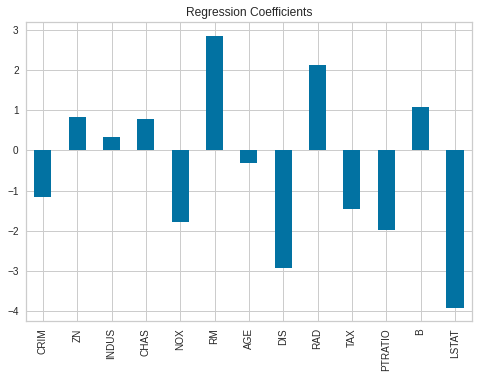

In [ ]:
c=pd.DataFrame(coeff, df.columns[:-1],columns=['Coeff'])
#print(c)
c['Coeff'].plot.bar()
plt.title("Regression Coefficients")

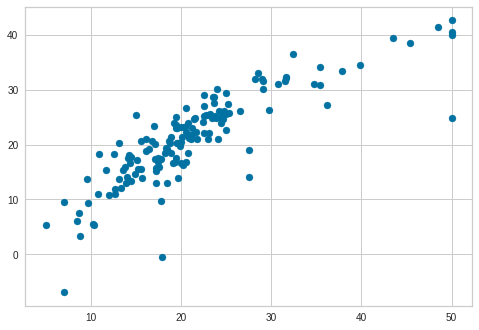

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.show()

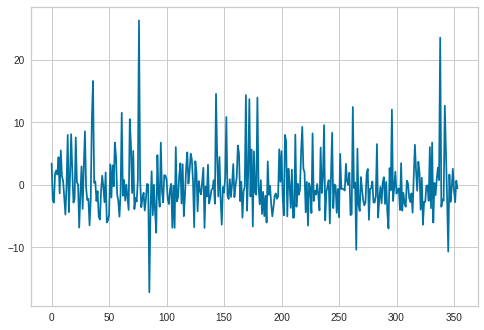

In [ ]:
#Residuals on training data
residuals= y_train-y_train_predict
#print(residuals)
plt.plot(residuals)

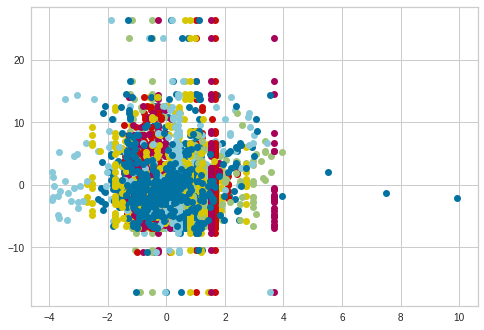

In [ ]:
plt.plot(X_train,residuals,'o')

0.6771696999851693

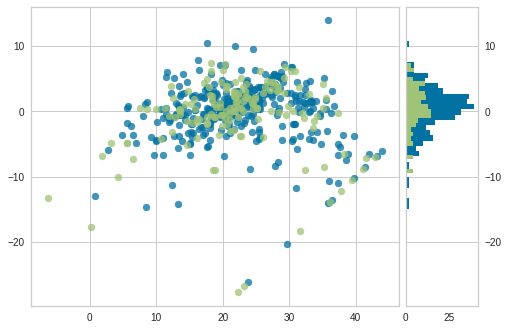

In [ ]:
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#visualizer.show()

#NOW USING ONLY Highly correlated stuff for Linear Regression
Most useful features can be chosen through EDA

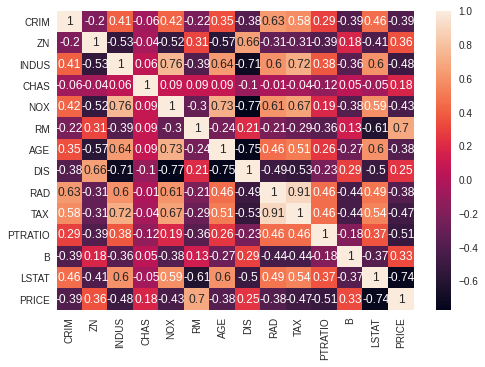

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

As we can see from this, RM, and LTSAT have strong absolute correlation with PRICE

Hence, now we train our dataset using only these 2 features

(354, 2)
(152, 2)
(354,)
(152,)
27.997510000764123
36.49422110915324


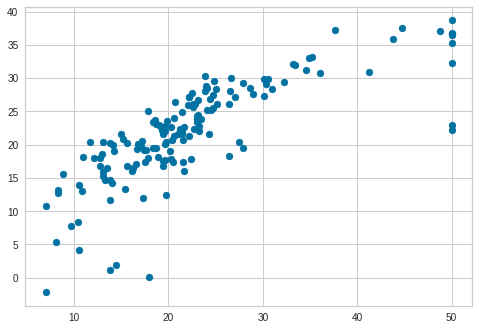

In [ ]:

X= pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns=['LSTAT','RM'])
y=df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


lm=LinearRegression()
lm.fit(X_train,y_train)

#Evaluating the model for train set
y_train_predict=lm.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print(mse_train)

#Evaluating the model for test set
y_test_predict = lm.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)
print(mse_test)

plt.scatter(y_test, y_test_predict)
plt.show()

Text(0.5, 1.0, 'Regression Coefficients')

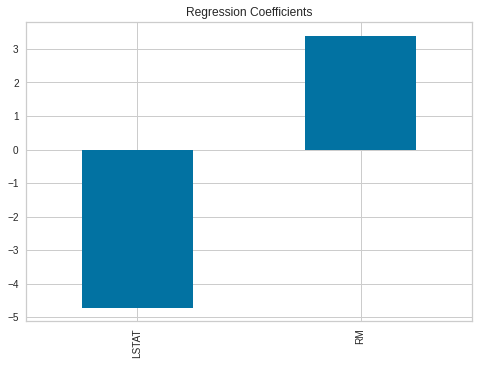

In [ ]:
coeff=lm.coef_
c=pd.DataFrame(coeff, X.columns[:],columns=['Coeff'])
c['Coeff'].plot.bar()
plt.title("Regression Coefficients")

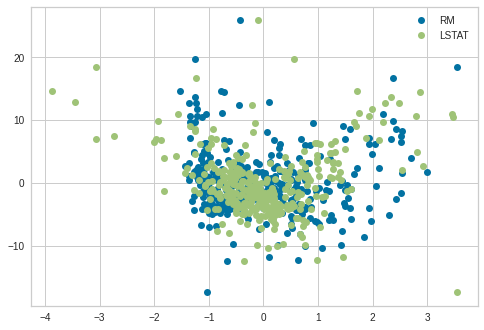

In [ ]:
#Residuals on training data
residuals= y_train-y_train_predict
#print(residuals)
#plt.plot(residuals,'o')
plt.plot(X_train,residuals,'o') #label=RM and LTSAT
plt.legend(labels=['RM','LSTAT'])

#Task 2


In [ ]:
from sklearn.linear_model import Ridge

X=house_price.data
y=house_price.target
#X=df[['RM','ZN','RAD','CRIM','TAX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

l_ridge = Ridge(alpha=0) #alpha is the regularization parameter (lambda)
l_ridge.fit(X_train,y_train)


ridge_df = pd.DataFrame({'features': house_price.feature_names, 'Coeff_estimates': l_ridge.coef_})
#ridge_df 

y_train_pred = []
y_test_pred = []

for a in np.arange(0,200,1):
  l_ridge=Ridge(alpha=a)
  l_ridge.fit(X_train,y_train)
  ridge_df['Coeff_estimates'+str(a)]=l_ridge.coef_
  
  #Evaluating the model for train set
  y_train_pred.append(l_ridge.predict(X_train))

  #Evaluating the model for test set
  y_test_pred.append(l_ridge.predict(X_test))

ridge_df = ridge_df.set_index('features').T.rename_axis('Coeff_estimates').reset_index()
ridge_df

(354, 13)
(152, 13)
(354,)
(152,)


features,Coeff_estimates,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Coeff_estimates,-1.146914,0.834326,0.339407,0.791636,-1.784727,2.847839,-0.304293,-2.915625,2.111400,-1.465200,-1.969635,1.075678,-3.903107
1,Coeff_estimates0,-1.146914,0.834326,0.339407,0.791636,-1.784727,2.847839,-0.304293,-2.915625,2.111400,-1.465200,-1.969635,1.075678,-3.903107
2,Coeff_estimates1,-1.133655,0.812628,0.310566,0.797254,-1.749523,2.854456,-0.307262,-2.875986,2.027825,-1.391496,-1.959662,1.072437,-3.887664
3,Coeff_estimates2,-1.121131,0.792400,0.284013,0.802468,-1.715853,2.860487,-0.309898,-2.837686,1.950757,-1.324574,-1.950046,1.069266,-3.872515
4,Coeff_estimates3,-1.109269,0.773487,0.259476,0.807323,-1.683607,2.865986,-0.312239,-2.800640,1.879435,-1.263600,-1.940761,1.066157,-3.857637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Coeff_estimates195,-0.641162,0.303411,-0.370319,0.855918,-0.498461,2.453474,-0.279537,-0.841888,0.049472,-0.384243,-1.346873,0.740074,-2.467338
197,Coeff_estimates196,-0.640451,0.303273,-0.370923,0.855345,-0.497493,2.450603,-0.279441,-0.838535,0.047706,-0.384450,-1.345318,0.739059,-2.463365
198,Coeff_estimates197,-0.639744,0.303136,-0.371523,0.854770,-0.496535,2.447737,-0.279347,-0.835204,0.045952,-0.384656,-1.343768,0.738049,-2.459410
199,Coeff_estimates198,-0.639041,0.303003,-0.372117,0.854194,-0.495587,2.444875,-0.279254,-0.831892,0.044212,-0.384863,-1.342223,0.737043,-2.455470


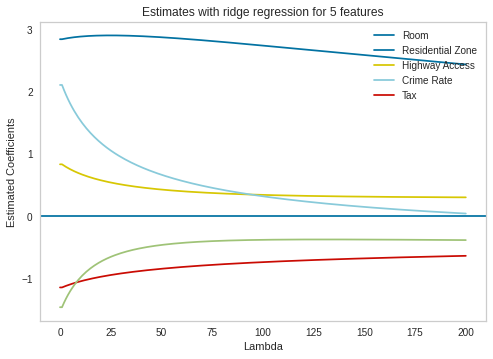

In [ ]:
plt.axhline(0)
#df1=ridge_df[['RM','ZN','RAD','CRIM','TAX']]

plt.plot(ridge_df.RM, 'b', ridge_df.ZN, 'y', ridge_df.RAD, 'c', ridge_df.CRIM, 'r', ridge_df.TAX, 'g')
plt.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])

plt.title("Estimates with ridge regression for 5 features")
plt.xlabel("Lambda")
plt.ylabel("Estimated Coefficients")
plt.grid()

Text(0.5, 1.0, 'Regression Coefficients')

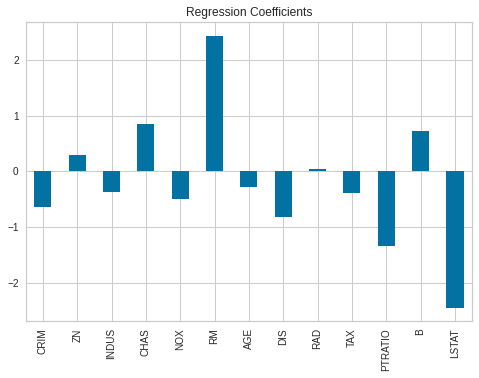

In [ ]:
coeff_ridge=l_ridge.coef_

df1=df[['RM','ZN','RAD','CRIM','TAX']]
c_ridge=pd.DataFrame(coeff_ridge, df.columns[:-1],columns=['Coeff'])
c_ridge['Coeff'].plot.bar()
plt.title("Regression Coefficients")

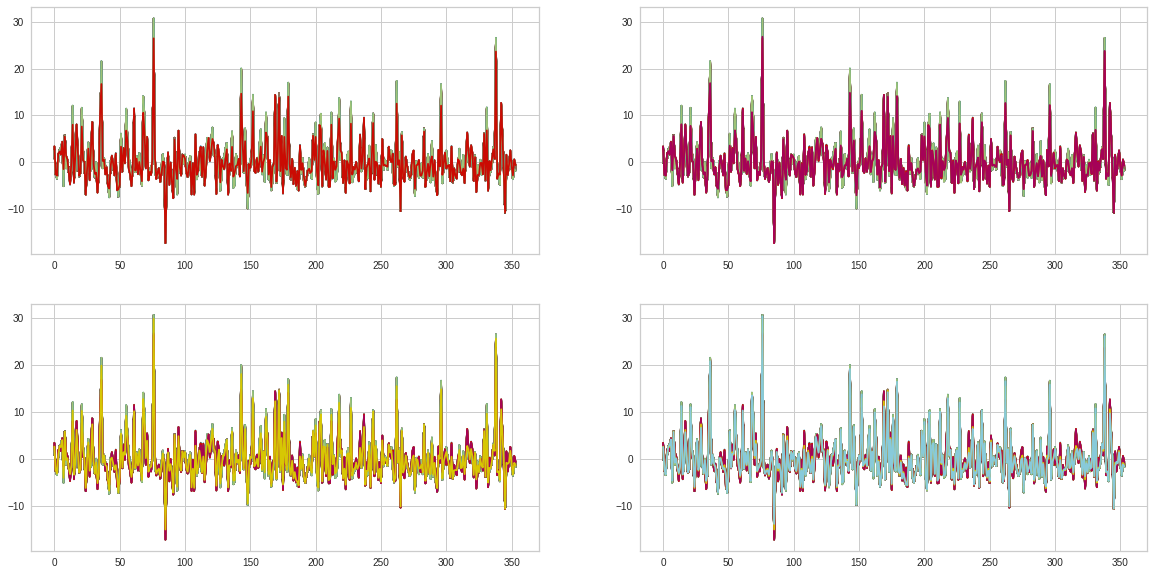

In [ ]:
#Residuals on training data
#residuals= y_train-y_train_pred
#print(residuals)
#plt.plot(residuals,'o')
#plt.plot(X_train,residuals.T,'o') #label=RM and LTSAT
fig, axes = plt.subplots(2,2,figsize=(20, 10))

ridge_df = pd.DataFrame({'features': house_price.feature_names, 'Coeff_estimates': l_ridge.coef_})

#np.arange(1,2,1) 
for l in [1,5,100,150]:
  l_ridge=Ridge(alpha=l)
  l_ridge.fit(X_train,y_train)
  ridge_df['Coeff_estimates'+str(l)]=l_ridge.coef_
  y_train_pred.append(l_ridge.predict(X_train))

  residuals=y_train-y_train_pred
  if(l==1):
    axes[0,0].plot(residuals.T)
  if(l==5):
    axes[0,1].plot(residuals.T)
  if(l==100):
    axes[1,0].plot(residuals.T)
  if(l==150):
    axes[1,1].plot(residuals.T)

In [ ]:
#Calculate Errors
from sklearn.metrics import mean_squared_error

for y_t in y_train_pred:
  mse_ridge_train= mean_squared_error(y_train, y_t)

for y_t in y_test_pred:
  mse_ridge_test= mean_squared_error(y_test, y_t)

print(mse_ridge_train)
print(mse_ridge_test)

26.1336520487822
25.185886164823717


##**Task** 3

In [ ]:
from sklearn.linear_model import Lasso

X=house_price.data
y=house_price.target
#X=df[['RM','ZN','RAD','CRIM','TAX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

l_lasso = Lasso(alpha=0) #alpha is the regularization parameter (lambda)
l_lasso.fit(X_train,y_train)


lasso_df = pd.DataFrame({'features': house_price.feature_names, 'Coeff_estimates': l_lasso.coef_})

y_train_pred = []
y_test_pred = []

for a in np.arange(0,200,1):
  l_lasso=Lasso(alpha=a)
  l_lasso.fit(X_train,y_train)
  lasso_df['Coeff_estimates'+str(a)]=l_lasso.coef_
  
  #Evaluating the model for train set
  y_train_pred.append(l_lasso.predict(X_train))

  #Evaluating the model for test set
  y_test_pred.append(l_lasso.predict(X_test))

lasso_df = lasso_df.set_index('features').T.rename_axis('Coeff_estimates').reset_index()
lasso_df

(354, 13)
(152, 13)
(354,)
(152,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3990.5502232735334, tolerance: 3.111537141242938
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to une

features,Coeff_estimates,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Coeff_estimates,-1.146914,0.834326,0.339407,0.791636,-1.784727,2.847839,-0.304293,-2.915625,2.1114,-1.4652,-1.969635,1.075678,-3.903107
1,Coeff_estimates0,-1.146914,0.834326,0.339407,0.791636,-1.784727,2.847839,-0.304293,-2.915625,2.1114,-1.4652,-1.969635,1.075678,-3.903107
2,Coeff_estimates1,-0.000000,0.000000,-0.000000,0.244363,-0.000000,2.690097,-0.000000,-0.000000,-0.0000,-0.0000,-1.242464,0.220679,-3.751752
3,Coeff_estimates2,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.245400,-0.000000,0.000000,-0.0000,-0.0000,-0.671266,0.000000,-3.336225
4,Coeff_estimates3,-0.000000,0.000000,-0.000000,0.000000,-0.000000,1.802257,-0.000000,0.000000,-0.0000,-0.0000,-0.073760,0.000000,-2.835053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Coeff_estimates195,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0000,-0.0000,-0.000000,0.000000,-0.000000
197,Coeff_estimates196,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0000,-0.0000,-0.000000,0.000000,-0.000000
198,Coeff_estimates197,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0000,-0.0000,-0.000000,0.000000,-0.000000
199,Coeff_estimates198,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0000,-0.0000,-0.000000,0.000000,-0.000000


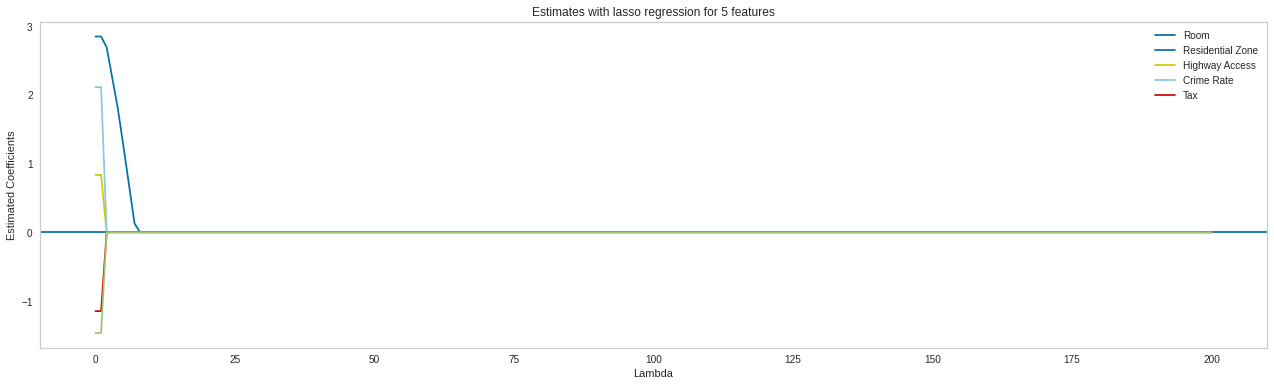

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6))
plt.axhline(0)
#df1=ridge_df[['RM','ZN','RAD','CRIM','TAX']]

plt.plot(lasso_df.RM, 'b', lasso_df.ZN, 'y', lasso_df.RAD, 'c', lasso_df.CRIM, 'r', lasso_df.TAX, 'g')
plt.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])

plt.title("Estimates with lasso regression for 5 features")
plt.xlabel("Lambda")
plt.ylabel("Estimated Coefficients")
plt.grid()

87.89652941364231
77.09851667615845


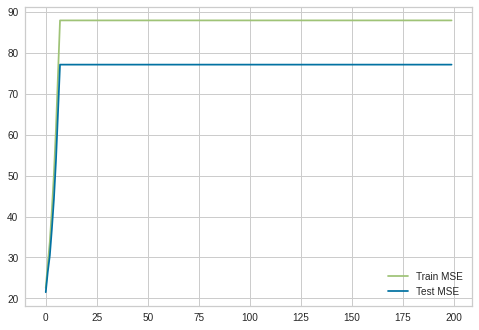

In [ ]:
#Calculate Errors
from sklearn.metrics import mean_squared_error

for y_t in y_train_pred:
  mse_lasso_train= mean_squared_error(y_train, y_t)

for y_t1 in y_test_pred:
  mse_lasso_test= mean_squared_error(y_test, y_t1)

mse_train_l = [mean_squared_error(y_train, y_t) for y_t in y_train_pred]
mse_test_l = [mean_squared_error(y_test, y_t) for y_t in y_test_pred]

print(mse_lasso_train)
print(mse_lasso_test)

plt.plot(mse_train_l, 'g', mse_test_l, 'b')
plt.legend(labels=['Train MSE','Test MSE'])

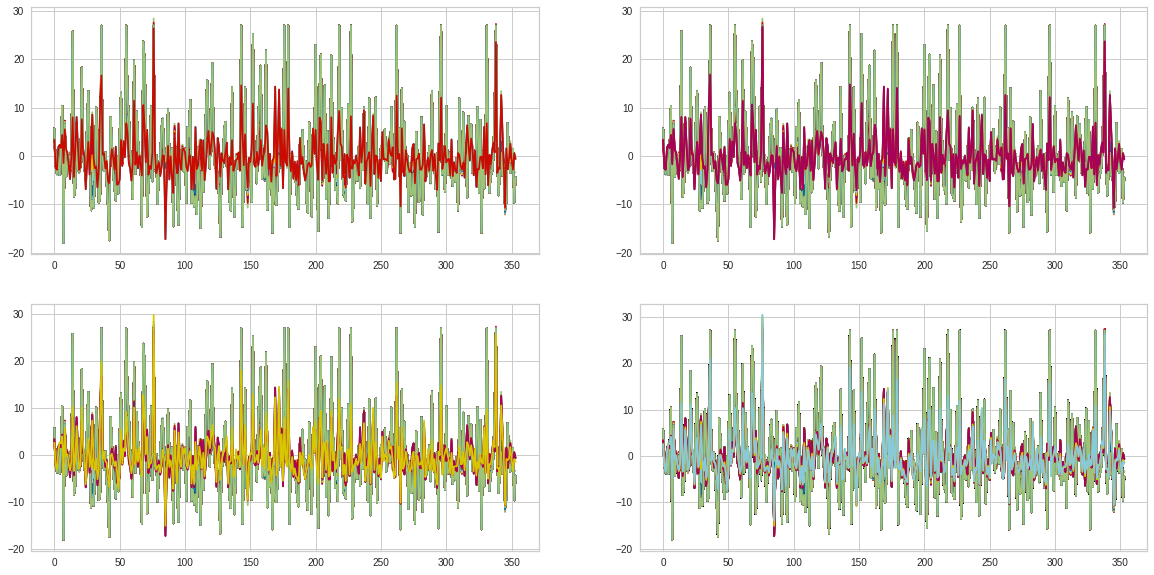

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(20, 10))

lasso_df = pd.DataFrame({'features': house_price.feature_names, 'Coeff_estimates': l_ridge.coef_})

#increase size of graph

#np.arange(1,4,1)
for l in [1,5,100,150]:
  l_lasso=Ridge(alpha=l)
  l_lasso.fit(X_train,y_train)
  lasso_df['Coeff_estimates'+str(l)]=l_lasso.coef_
  y_train_pred.append(l_lasso.predict(X_train))

  residuals=y_train-y_train_pred
  plt.plot(residuals.T)
  if(l==1):
    axes[0,0].plot(residuals.T)
  if(l==5):
    axes[0,1].plot(residuals.T)
  if(l==100):
    axes[1,0].plot(residuals.T)
  if(l==150):
    axes[1,1].plot(residuals.T)

TASK 4: done along with each model (with lambda =[1,5,100,150] for ridge and lasso regression)

TASK 5: done along with each model